In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:

df = pd.read_csv("Iris.csv")  
df.drop(columns=["Id"], inplace=True)  
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


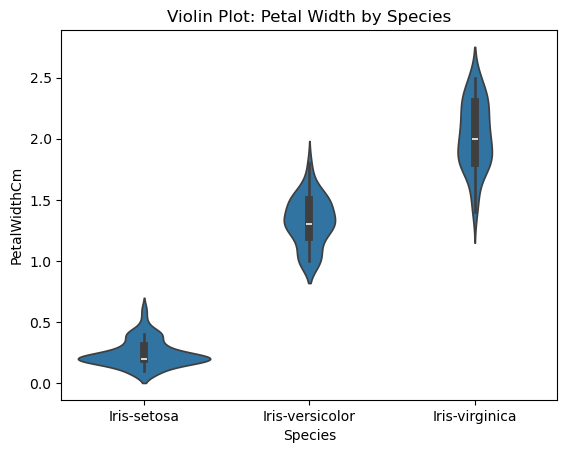

In [5]:
sns.violinplot(x="Species", y="PetalWidthCm", data=df)
plt.title("Violin Plot: Petal Width by Species")
plt.show()


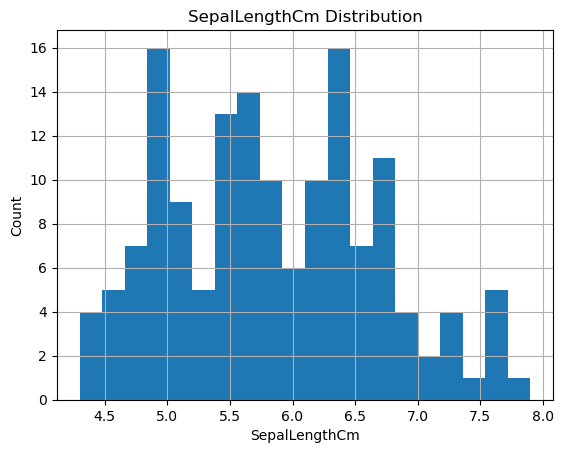

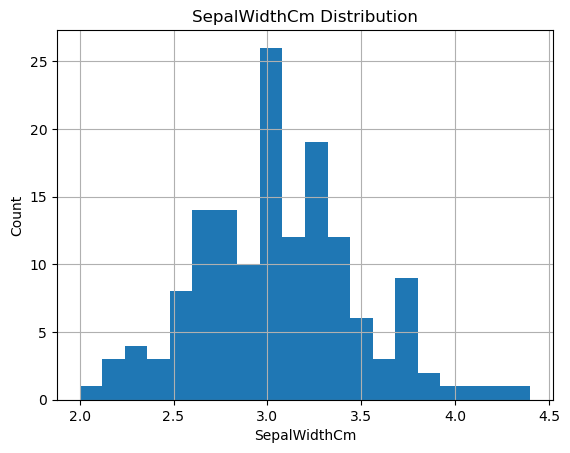

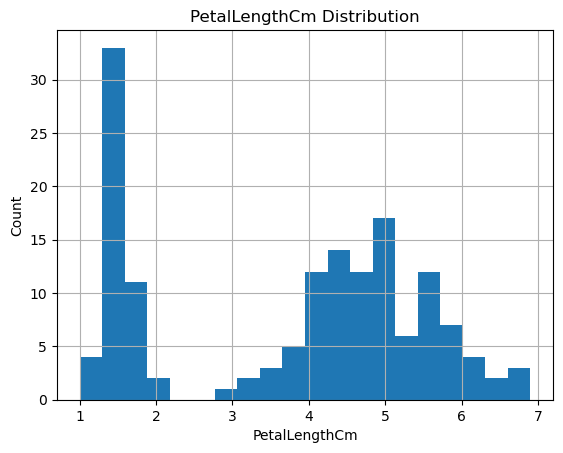

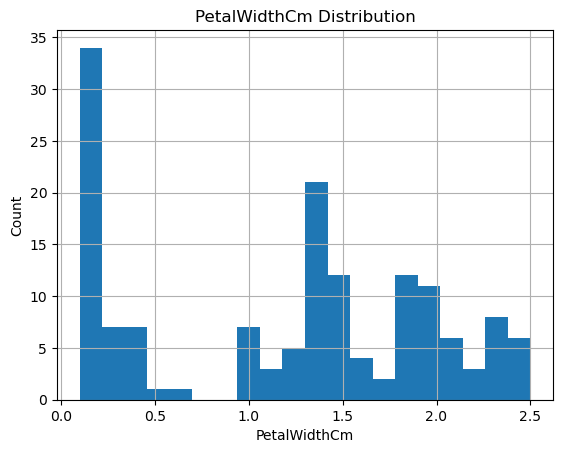

In [19]:
import matplotlib.pyplot as plt

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for col in features:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

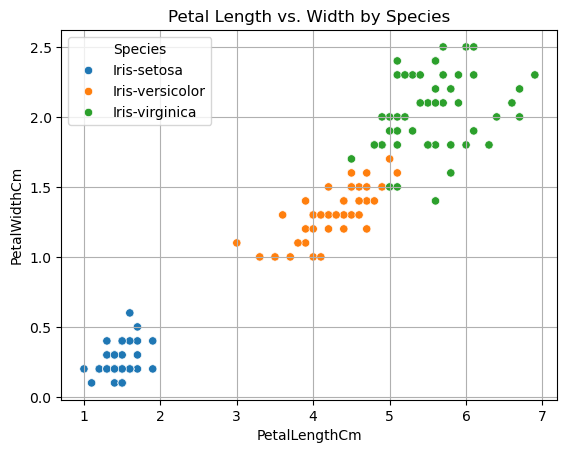

In [20]:
plt.figure()
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title("Petal Length vs. Width by Species")
plt.grid(True)
plt.show()


In [11]:

X = df.drop(columns=["Species"])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)


df["Cluster"] = kmeans.labels_


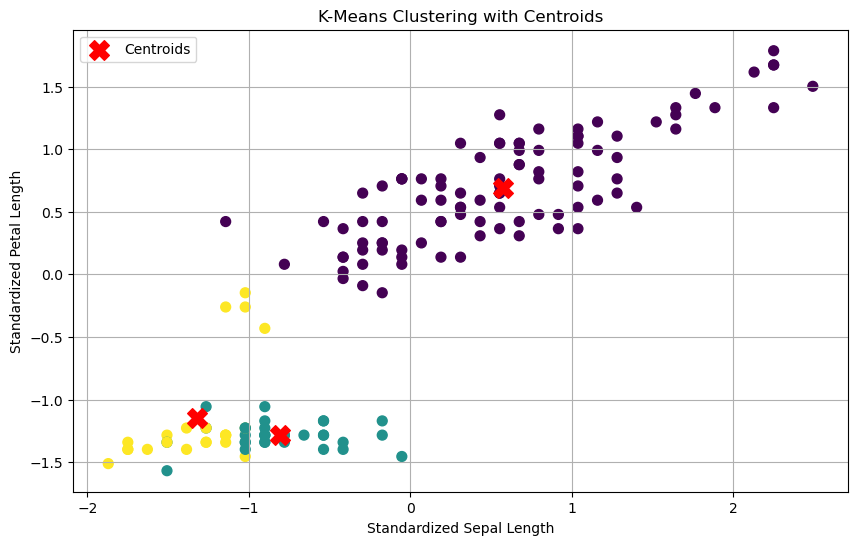

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=df["Cluster"], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c='red', s=200, marker='X', label='Centroids')
plt.xlabel("Standardized Sepal Length")
plt.ylabel("Standardized Petal Length")
plt.title("K-Means Clustering with Centroids")
plt.legend()
plt.grid(True)
plt.show()


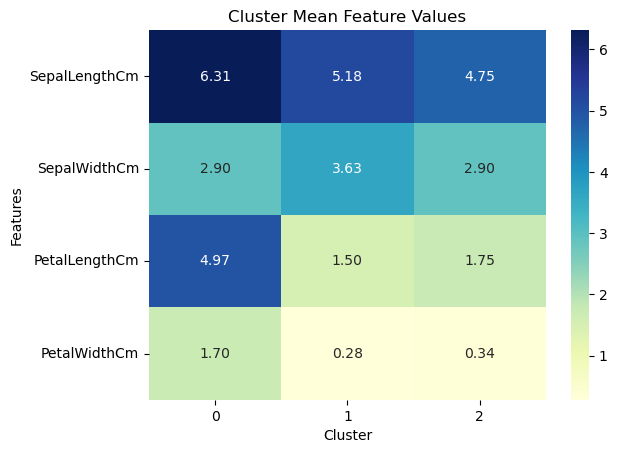

In [16]:
cluster_means = df.groupby("Cluster").mean(numeric_only=True)
sns.heatmap(cluster_means.T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Cluster Mean Feature Values")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.show()


In [14]:
# Make up a new sample: [SepalLength, SepalWidth, PetalLength, PetalWidth]
new_sample = pd.DataFrame([[6.1, 2.9, 4.7, 1.4]], columns=X.columns)

# Scale the new input
new_sample_scaled = scaler.transform(new_sample)

# Predict its cluster
predicted_cluster = kmeans.predict(new_sample_scaled)
print(f"New flower belongs to cluster: {predicted_cluster[0]}")


New flower belongs to cluster: 0
